In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

In [2]:
df_call=pd.read_csv("FINAL CALL DATA.csv")


In [3]:
n = len(df_call)
n_train =  (int)(0.7 * n)
print(n_train)

193907


In [4]:
train = df_call[0:n_train]
X_train = train[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [C_IV]']].values
y_train = train[' [C_LAST]'].values

In [5]:
test = df_call[n_train+1:n]
X_test = test[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [C_IV]']].values
y_test = test[' [C_LAST]'].values

In [14]:
model_call = xgb.XGBRegressor(
    max_depth=4,
    n_estimators=1000,
    eta=0.1,
    gamma = 0.1,
    reg_lambda=10,
    reg_alpha=1,
    verbosity=2,
    min_child_weight=3,
    scale_pos_weight =10)

In [17]:
history = model_call.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 50)

[01:25:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[0]	validation_0-rmse:48.55442
[01:25:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[1]	validation_0-rmse:45.70052
[01:25:47] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[2]	validation_0-rmse:43.06572
[01:25:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[3]	validation_0-rmse:40.82711
[01:25:48] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=4
[4]	validation_0-rmse

In [18]:
history.evals_result()

{'validation_0': OrderedDict([('rmse',
               [48.55442,
                45.700523,
                43.065723,
                40.827106,
                38.72617,
                36.790707,
                35.043388,
                33.483284,
                32.198563,
                31.054363,
                29.916376,
                29.012465,
                28.120039,
                27.344893,
                26.709204,
                25.966022,
                25.376444,
                24.824879,
                24.410507,
                24.011858,
                23.550255,
                23.22788,
                22.774914,
                22.488411,
                22.109547,
                21.82836,
                21.50914,
                21.257652,
                21.077934,
                20.809486,
                20.624521,
                20.371119,
                20.109287,
                20.00532,
                19.819721,
                19.647

In [19]:
y_train_pred=model_call.predict(X_train)

In [20]:
print(len(y_train_pred))

193907


In [21]:
train['Call_XGB']=y_train_pred
train

<ipython-input-21-a955d9e592a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Call_XGB']=y_train_pred


,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS,Call_XGB
0,172.17,0.008219,0.94168,0.00094,0.01792,-0.03468,0.00227,0.84394,23.00,147.0,25.282476,22.389021
1,172.17,0.008219,0.94263,0.00186,0.01850,-0.06046,0.00321,0.74618,21.75,150.0,22.279862,22.069809
2,172.17,0.008219,0.94503,0.00174,0.01738,-0.03516,0.00189,0.64277,17.55,152.5,19.761204,18.516706
3,172.17,0.008219,0.94318,0.00412,0.01893,-0.08519,0.00381,0.58444,17.17,155.0,17.274256,18.267197
4,172.17,0.008219,0.94856,0.00337,0.01729,-0.03541,0.00301,0.47237,13.60,157.5,14.746163,13.175506
...,...,...,...,...,...,...,...,...,...,...,...,...
193902,179.02,1.649425,0.65827,0.00573,0.84465,-0.02014,1.41244,0.28033,32.60,165.0,35.369786,32.310009
193903,179.02,1.649425,0.62671,0.00588,0.87102,-0.02038,1.36556,0.27820,30.90,170.0,32.577601,29.337259
193904,179.02,1.649425,0.59577,0.00612,0.89144,-0.02070,1.31353,0.27681,27.13,175.0,29.994880,25.304995
193905,179.02,1.649425,0.56406,0.00628,0.90553,-0.02039,1.25991,0.27454,24.73,180.0,27.482092,23.917704


In [22]:
y_true=train[' [C_LAST]']
y_pred=train['Call_XGB']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  1.4332954774807514
MSE =  9.220003203760482
RMSE =  3.0364458176889113


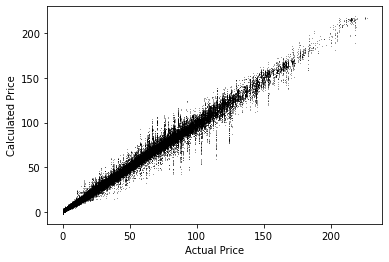

In [23]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

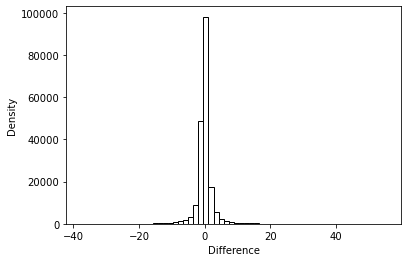

In [24]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [25]:
y_test_pred=model_call.predict(X_test)

In [26]:
len(y_test_pred)

83103

In [27]:
test['Call_XGB']=y_test_pred
test

<ipython-input-27-088ebf25133c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Call_XGB']=y_test_pred


,[UNDERLYING_LAST],[DTE],[C_DELTA],[C_GAMMA],[C_VEGA],[C_THETA],[C_RHO],[C_IV],[C_LAST],[STRIKE],Call_BS,Call_XGB
193908,179.02,1.649425,0.47056,0.00645,0.91520,-0.02033,1.08559,0.26887,18.55,195.0,20.895615,18.815966
193909,179.02,1.649425,0.44009,0.00641,0.90725,-0.02019,1.02520,0.26711,16.70,200.0,18.986668,17.468529
193910,179.02,1.649425,0.41070,0.00633,0.89419,-0.01936,0.96454,0.26497,14.95,205.0,17.174165,16.142727
193911,179.02,1.649425,0.38230,0.00629,0.87701,-0.01918,0.90546,0.26478,13.60,210.0,15.664548,14.369842
193912,179.02,1.649425,0.35522,0.00610,0.85580,-0.01888,0.84713,0.26322,12.55,215.0,14.150901,14.228280
...,...,...,...,...,...,...,...,...,...,...,...,...
277006,293.20,2.060274,0.18480,0.00260,1.12195,-0.01733,0.91873,0.24551,10.95,420.0,12.220778,4.829442
277007,293.20,2.060274,0.15494,0.00231,0.99964,-0.01550,0.77516,0.24797,6.00,440.0,10.053164,4.829442
277008,293.20,2.060274,0.08492,0.00159,0.65873,-0.00965,0.44507,0.23212,3.49,480.0,5.019698,5.016845
277009,293.20,2.060274,0.07622,0.00146,0.60341,-0.00848,0.39812,0.23210,2.85,490.0,4.428689,5.016845


In [28]:
y_true=test[' [C_LAST]']
y_pred=test['Call_XGB']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  8.49370108566025
MSE =  236.5417800446542
RMSE =  15.379914825663183


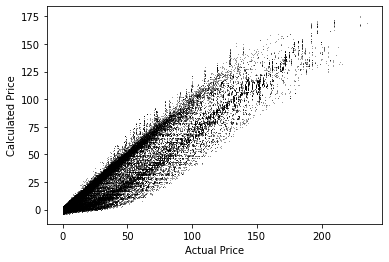

In [29]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

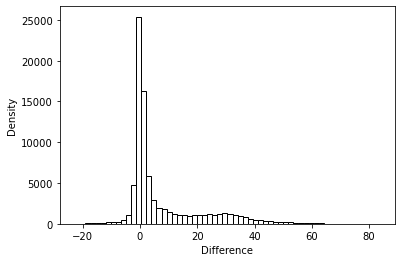

In [30]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [69]:
# param_grid = {
#     'max_depth' : [5, 10],
#     'n_estimators' : [1000, 200],
#     'eta' : [0.1, 0.01, 0.5],
#     'gamma' : [0, 0.5],
#     'reg_lambda' : [10, 20],
# }

In [64]:
# from sklearn.model_selection import GridSearchCV

In [70]:
# optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(seed=42, subsample=0.8, colsample_bytree=0.8),
#                               param_grid=param_grid, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=4, cv=3)

In [71]:
# optimal_params.fit(X_train, 
#                    y_train,
#                    eval_metric="rmse", 
#                    eval_set=[(X_test, y_test)], 
#                    verbose=True, 
#                    early_stopping_rounds = 20)
# print(optimal_params.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[23:10:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[0]	validation_0-rmse:59.16542
[23:10:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 60 extra nodes, 0 pruned nodes, max_depth=5
[1]	validation_0-rmse:58.79360
[23:10:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[2]	validation_0-rmse:58.42353
[23:10:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 58 extra nodes, 0 pruned nodes, max_depth=5
[3]	validation_0-rmse:58.05819
[23:10:46] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 60 

In [31]:
# train.to_csv('XGB CALL train FINAL Results.csv', mode='a', index=False, header=True)

In [32]:
# test.to_csv('XGB CALL test FINAL Results.csv', mode='a', index=False, header=True)

In [33]:
# import pickle
# filename = 'Call_XGB.sav'
# pickle.dump(model_call, open(filename, 'wb'))


In [34]:
df_put=pd.read_csv("FINAL PUT DATA.csv")
df_put

,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS
0,172.17,0.008219,135.0,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.77790,0.000762
1,172.17,0.008219,140.0,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.67034,0.000797
2,172.17,0.008219,144.0,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.58576,0.000820
3,172.17,0.008219,145.0,0.01,-0.00214,0.00056,0.00065,-0.00460,0.00000,0.56515,0.000833
4,172.17,0.008219,146.0,0.01,-0.00191,0.00055,0.00094,-0.00450,0.00000,0.54460,0.000845
...,...,...,...,...,...,...,...,...,...,...,...
241798,293.20,2.060274,350.0,80.38,-0.69845,0.00415,1.41879,-0.02242,-5.75046,0.19411,59.202701
241799,293.20,2.060274,360.0,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.18650,65.179230
241800,293.20,2.060274,370.0,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.17749,71.388575
241801,293.20,2.060274,380.0,97.00,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.16808,78.021552


In [35]:
n = len(df_put)
n_train =  (int)(0.7 * n)
print(n_train)

169262


In [36]:
train = df_put[0:n_train]
X_train = train[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [P_IV]']].values
y_train = train[' [P_LAST]'].values

In [37]:
test = df_put[n_train+1:n]
X_test = test[[' [UNDERLYING_LAST]', ' [DTE]', ' [STRIKE]', ' [P_IV]']].values
y_test = test[' [P_LAST]'].values

In [82]:
model_put = xgb.XGBRegressor(
    max_depth=12,
    n_estimators=1000,
    eta=0.1,
    gamma = 0.1,
    reg_lambda=10,
    reg_alpha=1,
    verbosity=2,
    min_child_weight=3,
    scale_pos_weight =10)

In [83]:
history=model_put.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 1)

[01:34:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 978 extra nodes, 0 pruned nodes, max_depth=12
[0]	validation_0-rmse:16.40986
[01:34:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1008 extra nodes, 0 pruned nodes, max_depth=12
[1]	validation_0-rmse:14.03590
[01:34:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1058 extra nodes, 2 pruned nodes, max_depth=12
[2]	validation_0-rmse:12.06801
[01:34:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1088 extra nodes, 0 pruned nodes, max_depth=12
[3]	validation_0-rmse:10.57706
[01:34:42] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/tree/updater_prune.cc:101: tree pruning end, 1152 extra nodes, 2 pruned nodes, max_depth=12
[4]	val

In [84]:
history.evals_result()

{'validation_0': OrderedDict([('rmse',
               [16.409857,
                14.035901,
                12.068006,
                10.57706,
                9.569379,
                8.912118,
                8.580695,
                8.507504,
                8.659781])])}

In [85]:
y_train_pred=model_put.predict(X_train)
print(y_train_pred)
train['Put_XGB']=y_train_pred
train

[0.22882932 0.22882932 0.23098142 ... 2.4359758  2.7122867  3.620746  ]


<ipython-input-85-cd6d851b53e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Put_XGB']=y_train_pred


,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS,Put_XGB
0,172.17,0.008219,135.0,0.02,-0.00103,0.00027,0.00070,-0.00390,0.00000,0.77790,0.000762,0.228829
1,172.17,0.008219,140.0,0.01,-0.00095,0.00038,0.00059,-0.00447,0.00000,0.67034,0.000797,0.228829
2,172.17,0.008219,144.0,0.01,-0.00151,0.00046,0.00119,-0.00462,-0.00043,0.58576,0.000820,0.230981
3,172.17,0.008219,145.0,0.01,-0.00214,0.00056,0.00065,-0.00460,0.00000,0.56515,0.000833,0.237577
4,172.17,0.008219,146.0,0.01,-0.00191,0.00055,0.00094,-0.00450,0.00000,0.54460,0.000845,0.243058
...,...,...,...,...,...,...,...,...,...,...,...,...
169257,194.19,1.597370,115.0,2.64,-0.06887,0.00180,0.32254,-0.00907,-0.25549,0.30592,1.855151,1.489419
169258,194.19,1.597370,120.0,3.14,-0.08134,0.00203,0.36610,-0.00979,-0.30273,0.29955,2.223690,1.795597
169259,194.19,1.597370,130.0,4.35,-0.11056,0.00271,0.45990,-0.01202,-0.41518,0.28727,3.131459,2.435976
169260,194.19,1.597370,135.0,5.18,-0.12741,0.00297,0.50695,-0.01294,-0.47852,0.27936,3.599630,2.712287


In [86]:
y_true=train[' [P_LAST]']
y_pred=train['Put_XGB']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  6.449009080626258
MSE =  201.57923973316994
RMSE =  14.197860392790526


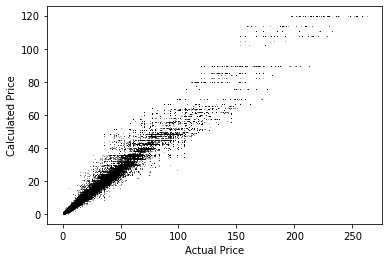

In [87]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

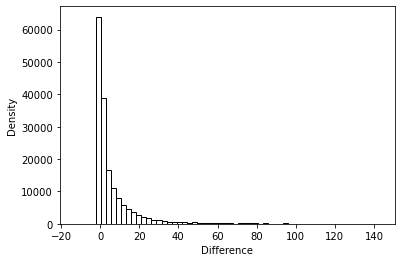

In [88]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [89]:
y_test_pred=model_put.predict(X_test)

In [90]:
len(y_test_pred)

72540

In [91]:
test['Put_XGB']=y_test_pred
test

<ipython-input-91-716bfb0c366d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Put_XGB']=y_test_pred


,[UNDERLYING_LAST],[DTE],[STRIKE],[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],Put_BS,Put_XGB
169263,194.19,1.597370,155.0,9.31,-0.21728,0.00458,0.71246,-0.01784,-0.82469,0.25979,6.751424,4.471373
169264,194.19,1.597370,160.0,10.60,-0.24403,0.00499,0.75959,-0.01922,-0.93018,0.25462,7.759016,5.602390
169265,194.19,1.597370,165.0,11.85,-0.27321,0.00539,0.80422,-0.01951,-1.04431,0.24932,8.862789,5.959595
169266,194.19,1.597370,170.0,14.00,-0.30350,0.00573,0.84444,-0.02100,-1.16709,0.24518,10.166727,7.329432
169267,194.19,1.597370,175.0,15.53,-0.33531,0.00607,0.87844,-0.02109,-1.29530,0.23976,11.495512,8.822229
...,...,...,...,...,...,...,...,...,...,...,...,...
241798,293.20,2.060274,350.0,80.38,-0.69845,0.00415,1.41879,-0.02242,-5.75046,0.19411,59.202701,80.011948
241799,293.20,2.060274,360.0,82.05,-0.74304,0.00396,1.30360,-0.02135,-6.15503,0.18650,65.179230,102.467606
241800,293.20,2.060274,370.0,111.23,-0.78759,0.00361,1.15885,-0.01832,-6.57983,0.17749,71.388575,102.467606
241801,293.20,2.060274,380.0,97.00,-0.83230,0.00330,0.98488,-0.01639,-7.00828,0.16808,78.021552,113.724373


In [92]:
y_true=test[' [P_LAST]']
y_pred=test['Put_XGB']
print('MAE = ', mean_absolute_error(y_true, y_pred))
print('MSE = ', mean_squared_error(y_true, y_pred))
print('RMSE = ', mean_squared_error(y_true, y_pred, squared=False))

MAE =  4.749285011634711
MSE =  72.37765018356569
RMSE =  8.507505520630927


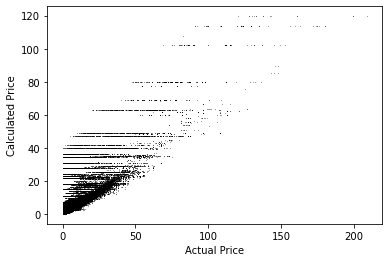

In [93]:
plt.scatter(y_true, y_pred,color='black',linewidth=0.2,alpha=0.5, s=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Calculated Price') 
plt.show()

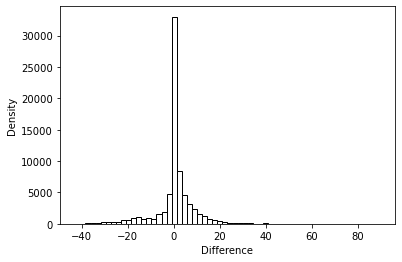

In [94]:
stats = dict()
stats['diff'] = y_true - y_pred
plt.hist(stats['diff'], bins=60,edgecolor='black',color='white')
plt.xlabel('Difference')
plt.ylabel('Density')
plt.show()

In [95]:
# train.to_csv('XGB PUT train FINAL Results.csv', mode='a', index=False, header=True)

In [96]:
# test.to_csv('XGB PUT test FINAL Results.csv', mode='a', index=False, header=True)

In [97]:
# filename = 'Put_XGB.sav'
# pickle.dump(model_put, open(filename, 'wb'))
